<a href="https://colab.research.google.com/github/AnmolArora15/ML-Projects/blob/main/Iris_using_LR%2CDT_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><b>IRIS DATA<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**Primary Objectives**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Informaton**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Identification & Handling of Missing Data and Duplicates**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection using Random Forest**](#Section71)<br>
  - **7.2** [**Data Preparation**](#Section72)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)<br>
  - **8.2** [**Logistic Regression Model Evaluation**](#Section82)<br>
  - **8.3** [**Decision Tree**](#Section83)<br>
  - **8.4** [**Decision Tree Model Evaluation**](#Section84)<br>
  - **8.5** [**Random Forest**](#Section85)<br>
  - **8.6** [**Random Forest Model Evaluation**](#Section86)<br>

**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
- It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.
- Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".
- The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.



---
<a name = Section2></a>
# **2. Primary Objective**
---
-In this notebook, we will construct Logistic Regression,Decision Tree Algorithms to classify the data.

We will also do a **Principal Component Analysis** later in this Notebook.

The following steps will be implemented -

1. Exploratory Data Analysis
2. Logistic Regression
3. Decision Tree
4. PCA with Logistic Regression
5. PCA with Decision Tree


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.5 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The dataset contains a set of 150 records under 5 attributes/features - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [2]:
!unzip '/content/archive (5).zip'

Archive:  /content/archive (5).zip
  inflating: IRIS.csv                


In [3]:
data = pd.read_csv('/content/IRIS.csv')
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10000,3.50000,1.40000,0.20000,Iris-setosa
1,4.90000,3.00000,1.40000,0.20000,Iris-setosa
2,4.70000,3.20000,1.30000,0.20000,Iris-setosa
3,4.60000,3.10000,1.50000,0.20000,Iris-setosa
4,5.00000,3.60000,1.40000,0.20000,Iris-setosa


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
print('The Shape of our DataSet is',data.shape)

The Shape of our DataSet is (150, 5)


**Observations** -
- Our DataSet consists of 150 Rows and 5 Columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations** -

- We have 150 rows of observations across 5 features.(verified)
- We don't have any Null values in our Data.
- The datatype of all the features looks fine.
- **Species** Column is our Target Feature.

<a name = Section42></a>
### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00000,150.00000,150.00000,150.00000
mean,5.84333,3.05400,3.75867,1.19867
std,0.82807,0.43359,1.76442,0.76316
min,4.30000,2.00000,1.00000,0.10000
25%,5.10000,2.80000,1.60000,0.30000
50%,5.80000,3.00000,4.35000,1.30000
75%,6.40000,3.30000,5.10000,1.80000
max,7.90000,4.40000,6.90000,2.50000


**Observations**:
- Our Datalooks Normally Distributed across all features.
- Mean of Sepal Length is - 5.84 and Median is - 5.80
- Mean of Sepal Width is - 3.05 and Median is - 3.00
- Mean of Petal Length is - 3.75 and Median is - 4.35
- Mean of Petal Width is - 1.19 and Median is - 1.30

In [7]:
#Lets see the skewness in our Data

In [8]:
data.skew()

sepal_length    0.31491
sepal_width     0.33405
petal_length   -0.27446
petal_width    -0.10500
dtype: float64

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [9]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

In [10]:
# Lets see the Pandas Pre Profiling Report

In [11]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')

**Observations**:
- Reports shows that the **number of variables**	in our data is **5**.
- We have 2 Duplicate Rows in our Dataset(We will check after this)
- No Missing Values
- sepal_length is highly overall correlated with petal_length,petal_width and species(We will see the Correlation matrix)
- petal_length is highly overall correlated with sepal_length,petal_width and species
- petal_width is highly overall correlated with sepal_length,petal_length and species
-species is highly overall correlated with sepal_length,petal_length and petal_width
-species is uniformly distributed

<a name = Section52></a>
### **5.2 Identification & Handling of Missing Data and Duplicates**

In [12]:
#We dont have any missing values in our Dataset

In [13]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
#Lets check the Duplicate Rows

In [15]:
data[data.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.90000,3.10000,1.50000,0.10000,Iris-setosa
34,4.90000,3.10000,1.50000,0.10000,Iris-setosa
37,4.90000,3.10000,1.50000,0.10000,Iris-setosa
101,5.80000,2.70000,5.10000,1.90000,Iris-virginica
142,5.80000,2.70000,5.10000,1.90000,Iris-virginica


In [16]:
data.duplicated().sum()

3

In [17]:
#Lets Remove the duplicate Rows

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(147, 5)

In [20]:
#We have removed the duplicate Rows and kept the First Rows dorp the duplicates

**Observations** -
- We had duplicates in our Dataset which we have removed.
- No missing vlaues.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [21]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Question 1**: What is the distribution of sepal_length, sepal_width, petal_length, and petal_width?

In [22]:
# Lets plot a histogram to see the distribution

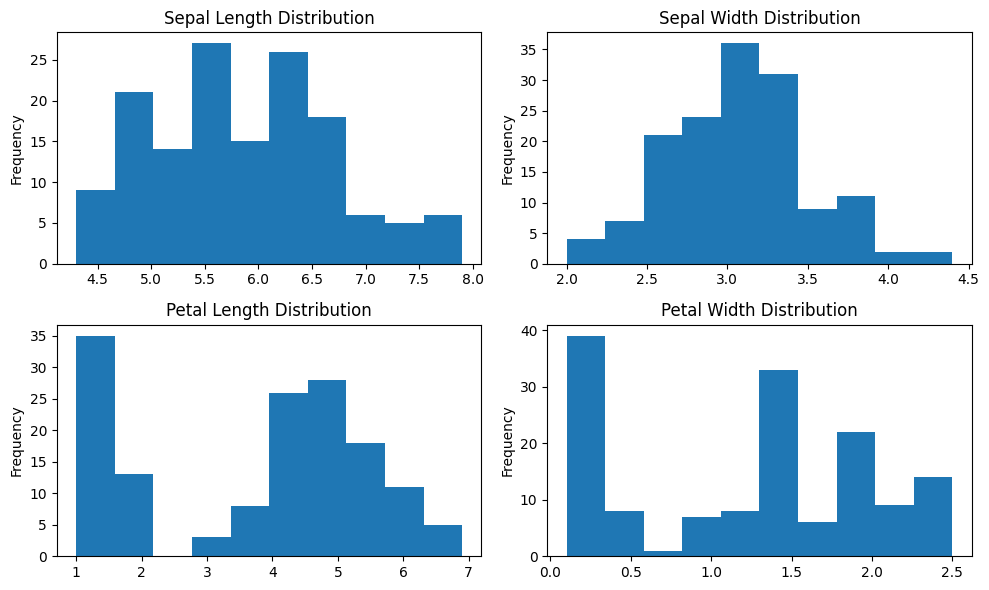

In [23]:
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
data['sepal_length'].plot(kind='hist', ax=axes[0, 0], title='Sepal Length Distribution')
data['sepal_width'].plot(kind='hist', ax=axes[0, 1], title='Sepal Width Distribution')
data['petal_length'].plot(kind='hist', ax=axes[1, 0], title='Petal Length Distribution')
data['petal_width'].plot(kind='hist', ax=axes[1, 1], title='Petal Width Distribution')
plt.tight_layout()
plt.show()

In [24]:
#Lets plot a box plot for better understanding

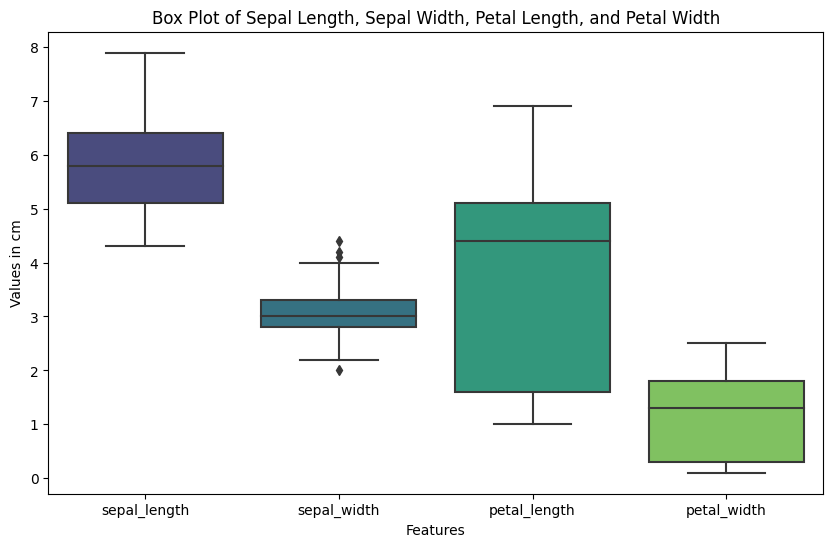

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], palette='viridis')
plt.title('Box Plot of Sepal Length, Sepal Width, Petal Length, and Petal Width')
plt.xlabel('Features')
plt.ylabel('Values in cm')
plt.show()

**Observations**:
- We can see how each feature is distributed in our Dataset.
- sepal_width has few potential outliers. We will not remove them as they can be a useful info.
- From the above Boxplot we can clearly see median value of **sepal_length > petal_length > sepal_width > petal_width**

**Question**: What are the different 'species' and how are they distributed

In [26]:
data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [27]:
#Earlier we had all 50 but we had few duplicate rows in our data

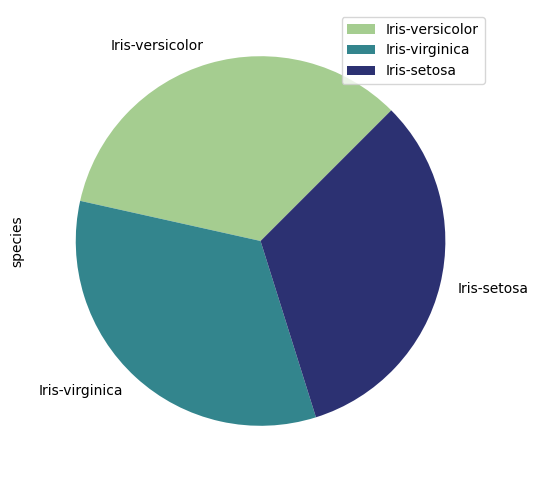

In [28]:
paper = plt.figure(figsize=(10,6))
data['species'].value_counts().plot.pie(cmap ='crest',startangle =45,legend=True)
plt.legend()
plt.show()

**Observations**:
- All three species namely Iris-versicolor,Iris-virginica and Iris-setosa are equally distributed.

In [29]:
#Lets do some bi-variate analysis

**Question**: What is the co-relation among different features in our Dataset?

In [30]:
#To see the co-relation we can plot a heatmap

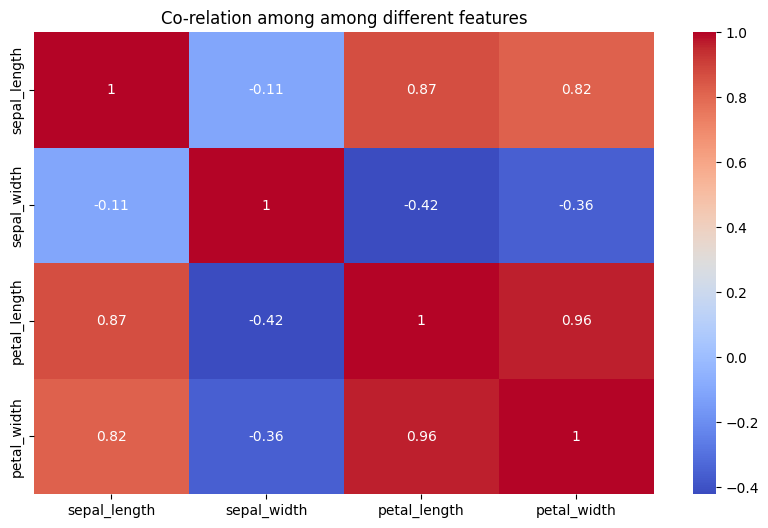

In [31]:
paper = plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap ='coolwarm')
plt.title('Co-relation among among different features')
plt.show()

**Observations**:

- petal_length is having high co-relation with sepal_length and petal_width.
- petal_length is also showing negative co-relation with sepal_width.
- petal_width is highly co-related with sepal_length and petal_length and negative co-related with sepal_width

**Question**: How does the distribution of each feature (sepal length, sepal width, petal length, and petal width) vary across different species (Iris-setosa, Iris-versicolor, and Iris-virginica)?

In [32]:
# Lets create box plots for each feature grouped by species

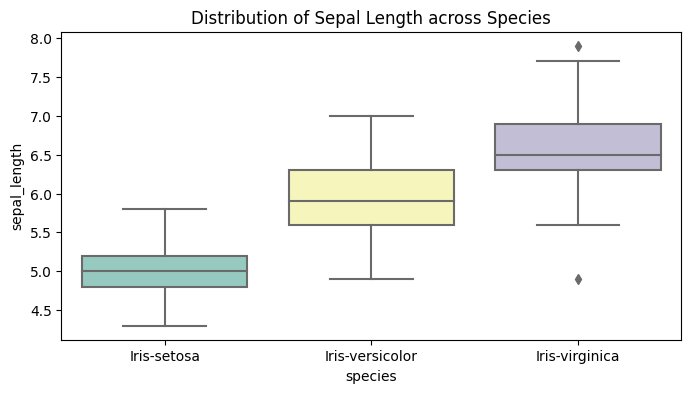

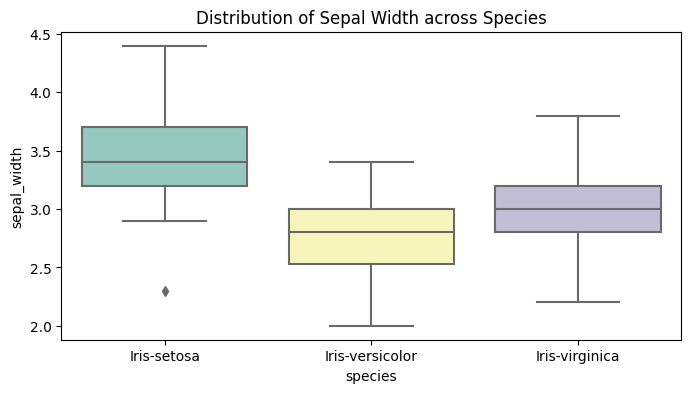

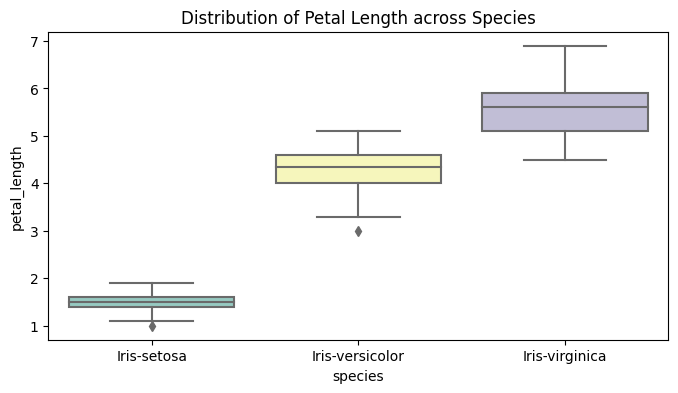

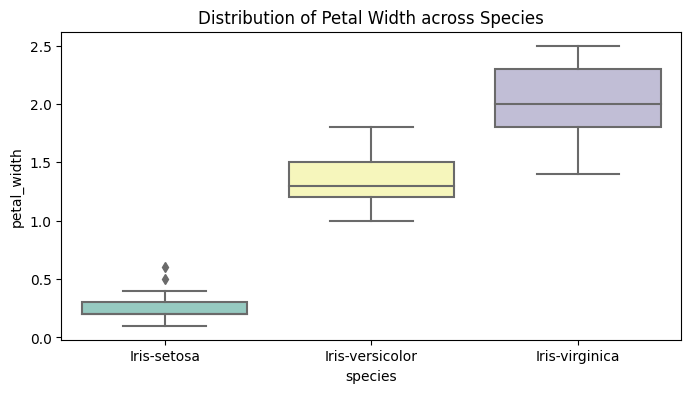

In [33]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='sepal_length', data=data, palette='Set3')
plt.title('Distribution of Sepal Length across Species')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='sepal_width', data=data, palette='Set3')
plt.title('Distribution of Sepal Width across Species')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='petal_length', data=data, palette='Set3')
plt.title('Distribution of Petal Length across Species')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='petal_width', data=data, palette='Set3')
plt.title('Distribution of Petal Width across Species')
plt.show()

**Observations**:
- We can see the distribution of different species based on their features.
- We can make multiple conclusion based on the above graphs depending upon the requirements.

Eg.
- Avg Sepal Length of Iris-verginica > Iris-versicolor > Iris-setosa.
- Avg Petal width of Iris-verginica > Iris-versicolor > Iris-setosa.


**Question**: Is there a correlation between the numerical features (sepal length, sepal width, petal length, and petal width)? How does the correlation vary for each species?

In [34]:
#Its a multi-variate quesion

In [35]:
#Lets plot a pairplot to have a better visualization

<Figure size 1500x600 with 0 Axes>

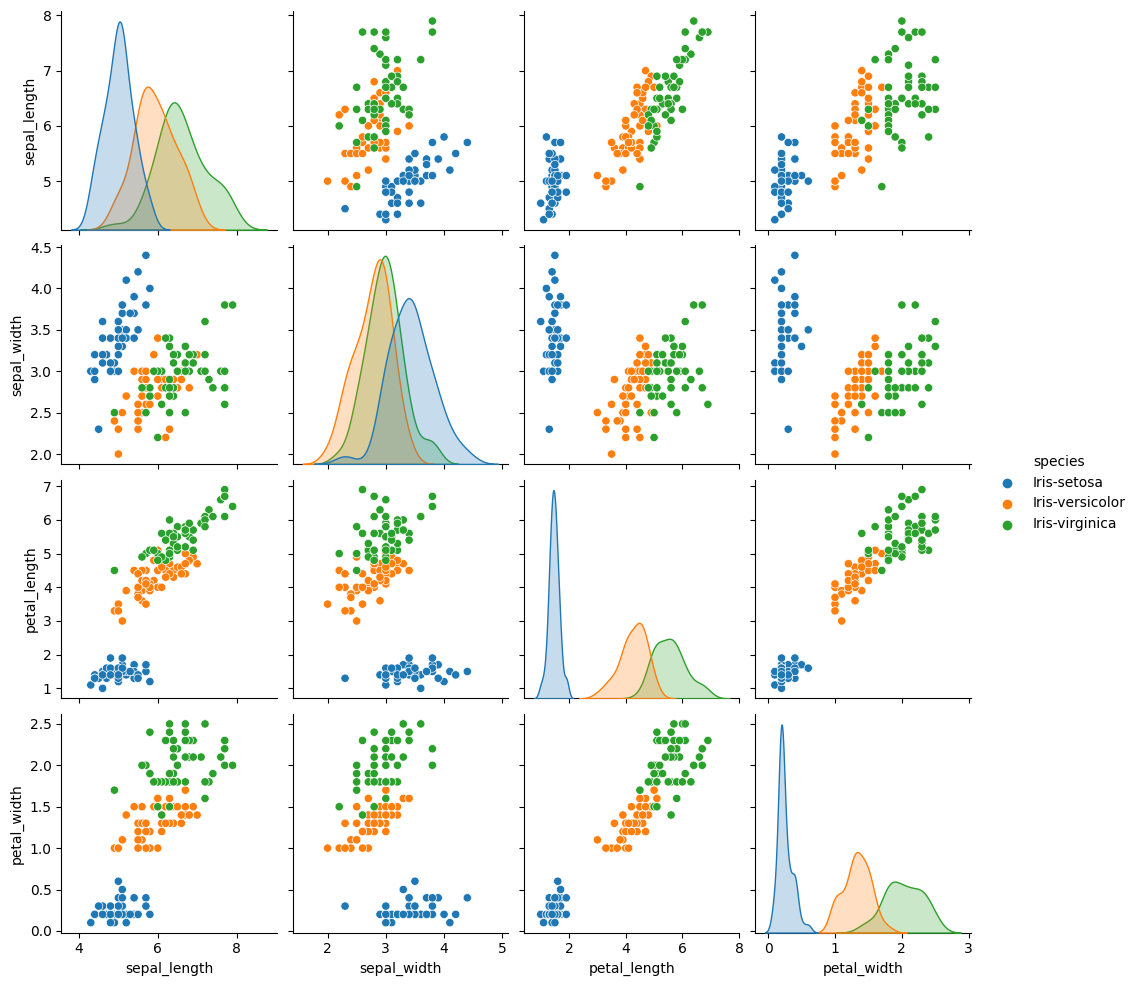

In [36]:
paper = plt.figure(figsize=(15,6))
sns.pairplot(data=data,hue='species')
plt.show()

**Observations**:
- The pair plot shows distinct clusters for each species.

-Iris-setosa appears to be well-separated from the other two species, while
 Iris-versicolor and Iris-virginica show some overlap.
- Few features can be seen showing **positive linear co-relation** with each
 other like petal_length and petal_width, as one increases other also tends to increase.
- With features like petal_length and petal_width we can clearly identify Iris-setosa some overlap in the other 2 species.
- Few outliers can be seen.


<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**

<a name = Section71></a>
### **7.1 Feature Selection**

Text(0.5, 1.0, 'Correlation between features')

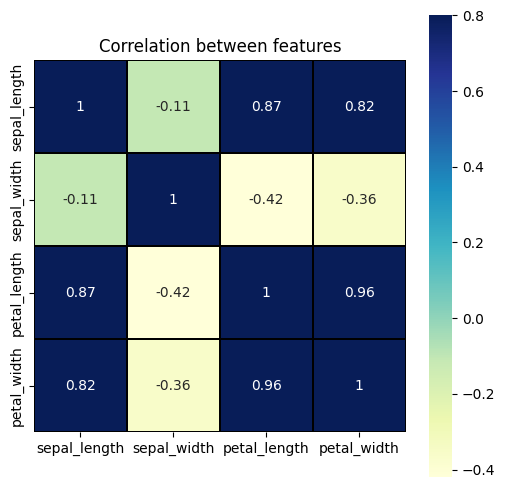

In [37]:
corr = data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations**-
- We have seen a few features that are highly correlated with each other.
- We will keep all the features as of now.

<a name = Section72></a>
### **7.2 Data Preparation**

- Now wlets **split** our **data** in **training** and **testing** part for further development.

In [38]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10000,3.50000,1.40000,0.20000,Iris-setosa
1,4.90000,3.00000,1.40000,0.20000,Iris-setosa


In [39]:
X = data.drop('species',axis=1)
y = data['species']

In [40]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.10000,3.50000,1.40000,0.20000
1,4.90000,3.00000,1.40000,0.20000


In [41]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: species, dtype: object

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [43]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (117, 4) (117,)
Testing Data Shape: (30, 4) (30,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will look on **Accuracy**, also we will check for **Precision**, **Recall** and **F1-Score**.


<a name = Section82></a>
### **8.1 Logistic Regression**


In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
preds_lr_train = lr.predict(X_train)
preds_lr_test = lr.predict(X_test)

<a name = Section82></a>
### **8.2 Logistic Regression Model Evaluation**



In [47]:
#Lets import from sklearn lib

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [50]:
#Lets see how our model predicts on the train data

In [51]:
model_eval(y_train,preds_lr_train)

Model Accuracy is:  0.97
[[38  0  0]
 [ 0 38  2]
 [ 0  1 38]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       117
      macro avg       0.97      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117



In [52]:
#Now Lets see how our model predicts on the test data

In [53]:
model_eval(y_test,preds_lr_test)

Model Accuracy is:  0.97
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Observations**:
- Our model is performing good on the train as well as the test data set.
- We have an accuracy of 97% (wow....!!)
- Let's check tree-based models and see if they perform better than Logistic Regression.

<a name = Section83></a>
### **8.3 Decision Tree**


In [54]:
# Lets apply Decision Tree to our Model

In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
preds_dtree_train = dtree.predict(X_train)
preds_dtree_test = dtree.predict(X_test)

<a name = Section84></a>
### **8.4 Decision Tree Model Evaluation**


In [57]:
model_eval(y_train,preds_dtree_train)

Model Accuracy is:  1.0
[[38  0  0]
 [ 0 40  0]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       117
      macro avg       1.00      1.00      1.00       117
   weighted avg       1.00      1.00      1.00       117



In [58]:
#Lets see on the test dataset

In [59]:
model_eval(y_test,preds_dtree_test)

Model Accuracy is:  0.97
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [60]:
#We can see the Feature Importances List

In [61]:
importances = list(zip(dtree.feature_importances_, X_train.columns))
importances.sort(reverse=True)
print(importances)


[(0.9164256007745706, 'petal_width'), (0.0600649735349429, 'petal_length'), (0.023509425690486634, 'sepal_width'), (0.0, 'sepal_length')]


In [62]:
#We can see our Decision Tree Split

In [63]:
from sklearn.tree import export_graphviz
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file


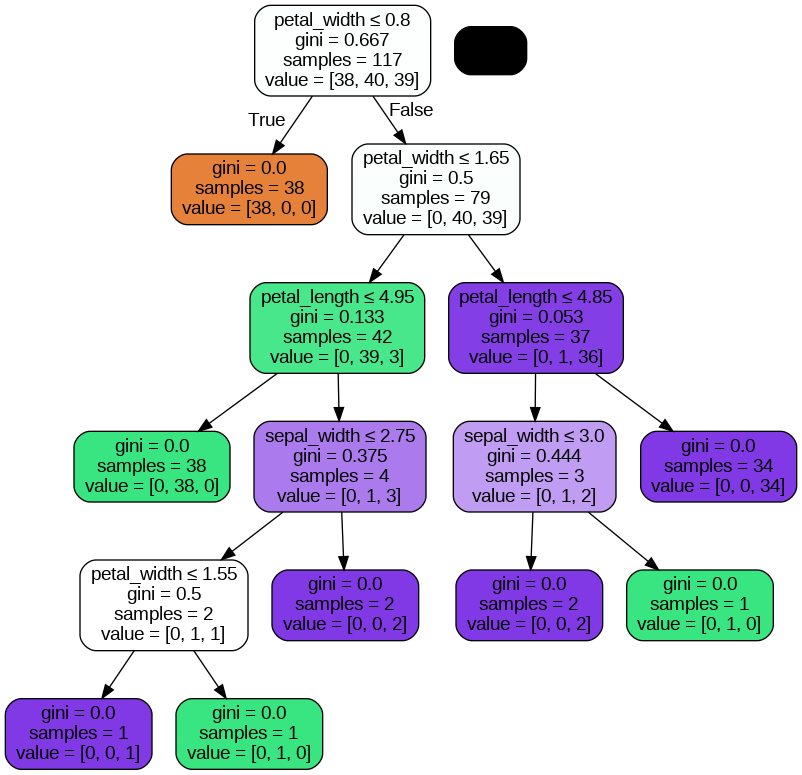

In [64]:
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtree,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

**Observations**-
- We can see our Model is predicting 100% on train dataset but on test the accuracy has come down to 93%.
- We have a over fitting model here.
- This might be due to the co-relation present among features.

<a name = Section85></a>
### **8.5 Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=150 ,verbose=2,max_depth=4,class_weight='balanced')

In [67]:
rf.fit(X_train,y_train)

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84 of 150
building tree 85 of 150
building tree 86 of 150
building tree 87 of 150
building tree 88 of 150
building tree 89 of 150
building tree 90 of 150
building tree 91 of 150
building tree 92 of 150
building tree 93 of 150
building tree 94 of 150
building tree 95 of 150
building tree 96 of 150
building tree 97 of 150
building tree 98 of 150
building tree 99 of 150
building tree 100 of 150
building tree 101 of 150
building tree 102 of 150
building tree 103 of 150
building tree 104 of 150
building tree 105 of 150
building tree 106 of 150
building tree 107 of 150
building tree 108 of 150
building tree 109 of 150
building tree 110 of 150
building tree 111 of 150
building tree 112 of 150
building tree 113 of 150
building tree 114 of 150
building tree 115 of 150


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=150,
                       verbose=2)

In [68]:
preds_rf_train = rf.predict(X_train)
preds_rf_test = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [69]:
model_eval(y_train,preds_rf_train)

Model Accuracy is:  1.0
[[38  0  0]
 [ 0 40  0]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       117
      macro avg       1.00      1.00      1.00       117
   weighted avg       1.00      1.00      1.00       117



In [70]:
model_eval(y_test,preds_rf_test)

Model Accuracy is:  0.97
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Observations** -

- We can see by hypertuning our Random Forest model we have got 100% train accuracy and 97 % on test.
- A bit of Overfitting is still there.
- Random Forest is performing better than Decision Tree.

<a name = Section9></a>

---
# **9. Summarization**
---

- We have seen how different features are responding to our Target feature.
- We have also done EDA on different features and saw the distribution of different species.
- In this Workbook, we have applied Logistic Regression, Decision Tree, and Random Forest.
- We have compared all the 3 model's performances.
- We can try to apply more complex classification algorithms like K-Nearest Neighbour or Support Vector Classifier and see if our Model performance increases.


**Thankyou**